# Master Thesis Script
## In- and Outgroup Word Count Analysis

After labelling in- and out-group words according to the dictionaries, manual labelling was done with a sample. In this script, performance of the dictionaries is evaluated, using manual annotations as ground truth

In [1]:
import numpy as np
import pandas as pd 
import json
import matplotlib.pyplot as plt
import scipy
import statistics
import math
from fitter import Fitter, get_common_distributions, get_distributions
from statistics import mode
from scipy.stats import nbinom
import ast
import random
import seaborn as sns
from joblib import Parallel, delayed
import statsmodels.api as sm
import pickle
import itertools
import scipy.stats
from sklearn.metrics import f1_score

In [2]:
df = pd.read_excel("Groupword_Annotations.xlsx")

In [ ]:
# no group words present

In [14]:
print(len(df[(df["No_Outgroup_Words_OG"] == 0) & (df["No_Outgroup_Words_Esther"] == 0)])/len(df))

0.84


In [15]:
print(len(df[(df["No_Ingroup_Words_OG"] == 0) & (df["No_Ingroup_Words_Esther"] == 0)])/len(df))

0.76


In [16]:
print((0.84+0.76)/2)

0.8


In [13]:
# group words present
pd.set_option('display.max_rows', None)  # Set to None for all rows


In [18]:
print(len(df[(df["Outgroup_Words_OG"] > 0) & (df["Outgroup_Words_Esther"] >0 )])/len(df))

0.9


In [19]:
print(len(df[(df["Ingroup_Words_OG"] > 0) & (df["Ingroup_Words_Esther"] >0)])/len(df))

0.78


In [20]:
print((0.9+0.78)/2)

0.8400000000000001


In [ ]:
# F1 score for no group words

In [14]:
df

,Index,Outgroup_Words_OG,Outgroup_Words_Esther,Ingroup_Words_OG,Ingroup_Words_Esther,No_Outgroup_Words_OG,No_Outgroup_Words_Esther,No_Ingroup_Words_OG,No_Ingroup_Words_Esther
0,1,1,1,2,1,0,0,0,0
1,2,2,3,1,1,0,0,0,0
2,3,1,1,3,2,0,0,0,1
3,4,1,0,1,1,0,0,0,0
4,5,2,2,1,0,0,0,0,0
5,6,1,1,1,0,0,2,0,0
6,7,1,2,2,2,0,0,0,1
7,8,2,2,1,1,0,0,0,1
8,9,1,1,2,1,0,2,0,1
9,10,1,1,1,1,0,1,0,1


In [3]:
outgroup_words_og = df["Outgroup_Words_OG"].values.tolist()
ingroup_words_og = df["Ingroup_Words_OG"].values.tolist()
No_outgroup_words_og = df["No_Outgroup_Words_OG"].values.tolist()
No_ingroup_words_og = df["No_Ingroup_Words_OG"].values.tolist()

outgroup_words_es = df["Outgroup_Words_Esther"].values.tolist()
ingroup_words_es = df["Ingroup_Words_Esther"].values.tolist()
No_outgroup_words_es = df["No_Outgroup_Words_Esther"].values.tolist()
No_ingroup_words_es = df["No_Ingroup_Words_Esther"].values.tolist()

In [10]:
# group words present
f1_score(outgroup_words_og, outgroup_words_es, average='macro')

0.24491392801251957

In [11]:
f1_score(ingroup_words_og, ingroup_words_es, average='macro')

0.2794059293690833

In [ ]:
print

In [33]:
# no group words present
f1_score(No_outgroup_words_og+No_ingroup_words_og, No_outgroup_words_es+No_ingroup_words_es, average='macro')

0.29629629629629634

In [30]:
f1_score(No_ingroup_words_og, No_ingroup_words_es, average='macro')

0.2878787878787879

In [21]:
from sklearn.metrics import precision_recall_fscore_support



# Calculate precision, recall, F1 score, and support for each class
precision, recall, f1, support = precision_recall_fscore_support(outgroup_words_og, outgroup_words_es, labels=[0, 1, 2, 3, 4, 5], average=None)

for label, p, r, f, supp in zip([0, 1, 2, 3, 4, 5], precision, recall, f1, support):
    print(f"Category {label}:")
    print("Precision:", p)
    print("Recall:", r)
    print("F1 Score:", f)
    print("Sample Size:", supp)
    print("------------")


Category 0:
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Sample Size: 0
------------
Category 1:
Precision: 0.8507462686567164
Recall: 0.76
F1 Score: 0.8028169014084507
Sample Size: 75
------------
Category 2:
Precision: 0.42105263157894735
Recall: 0.47058823529411764
F1 Score: 0.4444444444444444
Sample Size: 17
------------
Category 3:
Precision: 0.3333333333333333
Recall: 0.16666666666666666
F1 Score: 0.2222222222222222
Sample Size: 6
------------
Category 4:
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Sample Size: 1
------------
Category 5:
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Sample Size: 1
------------


/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/jupyterhub/lib64/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# macro avg F1 outgroup
print((0.91+0.8+0.44+0.22)/4)
# macro avg f1 ingroup
print((0.86+0.68+0.57+0.15)/4)

0.5925
0.565


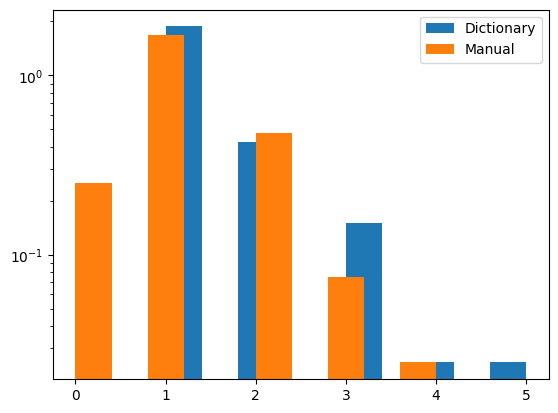

In [8]:

plt.hist(outgroup_words_og, bins=10,density=True, label="Dictionary")
plt.hist(outgroup_words_es, bins=10,density=True, label="Manual")
plt.yscale('log')
# Add legend
plt.legend()
# Display the plot
plt.savefig('Figures/Outgroup_Words_Validation.svg', format='svg')

plt.show()

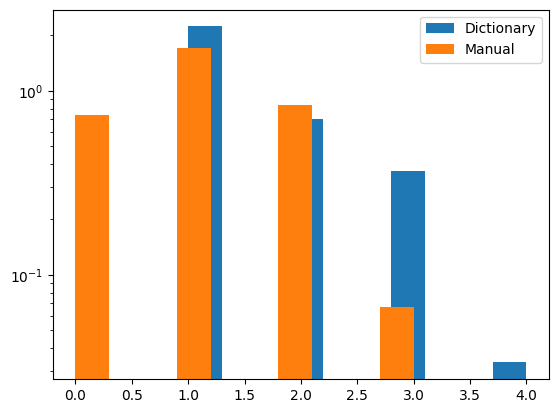

In [9]:

plt.hist(ingroup_words_og, bins=10,density=True, label="Dictionary")
plt.hist(ingroup_words_es, bins=10,density=True, label="Manual")
plt.yscale('log')
# Add legend
plt.legend()
# Display the plot
plt.savefig('Figures/Ingroup_Words_Validation.svg', format='svg')

plt.show()